1.	Set up five lists of randomly generated strings of characters (i.e. a-z or A-Z e.g. abcdefkjklkjlkjlkjkljlkjlkjlkjkljasdfgtredghjkiuyt). Each string should be 50 characters long. The first list should have 200 strings (each string should be 50 characters long), second should have 400 strings (again each string is 50 characters), third 600 (same length strings i.e. 50 characters), fourth 800 (string length continues to be 50 characters), and last/fifth 1000 strings (yes 50 characters in each string). 

2.	You may use the code we used in previous homework assignments.  Make sure the list is unsorted and does not contain any duplicates.

3.	Use the textbook implementation of quicksort to sort the data, being sure to capture the amount of time it takes for each list. 

4.	Now use at least two other sorting algorithms on the same data set (e.g. merge sort, bubble sort, insertion sort, etc).  Make sure that you code the sorting algorithm and you do not use a builtin function. By this I mean you may not use np.sort() or sorted(), etc.  You must code the algorithm in order to compare the complexity of each.  Here is a good resource https://www.geeksforgeeks.org/sorting-algorithms/ (Links to an external site.)).  Capture the computation time for each list using each sorting algorithm that you have used. 

Remember to use an unsorted copy of the list each time.  Some functions alter the original list and don't return a copy.  For instance, take a look at pancake sort

arr = [23, 10, 20, 11, 12, 6, 7]
print(arr)
>> [23, 10, 20, 11, 12, 6, 7]
n = len(arr)
pancakeSort(arr, n)
print(arr)
>> [6, 7, 10, 11, 12, 20, 23]

arr now can NOT be used for another test.  Be sure to use proper copies if your choice of algorithm does this (not all do).  Reach out if you need a hand with this.

5.	Create a table containing each algorithm and the timings for each list.  Provide a graph showing how each algorithm scales with size of list (also compare the algorithms themselves).  Discuss your findings with explanations for what you observe.  
 

In [14]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
from decimal import Decimal
import random
import string

from platform import python_version

print("python version",python_version())

python version 3.8.5


# 1.	Set up five lists of randomly generated strings of characters (i.e. a-z or A-Z e.g. abcdefkjklkjlkjlkjkljlkjlkjlkjkljasdfgtredghjkiuyt). Each string should be 50 characters long. The first list should have 200 strings (each string should be 50 characters long), second should have 400 strings (again each string is 50 characters), third 600 (same length strings i.e. 50 characters), fourth 800 (string length continues to be 50 characters), and last/fifth 1000 strings (yes 50 characters in each string). 

# 2.	You may use the code we used in previous homework assignments.  Make sure the list is unsorted and does not contain any duplicates.

In [15]:
#use random seed generator 
random.seed(0)

# generate uniformly distributed random strings of lenght 50
array_string_50_200 = [''.join(random.choices(string.ascii_letters, k = 50)) for _ in range(200)]
array_string_50_400 = [''.join(random.choices(string.ascii_letters, k = 50)) for _ in range(400)]
array_string_50_600 = [''.join(random.choices(string.ascii_letters, k = 50)) for _ in range(600)]
array_string_50_800 = [''.join(random.choices(string.ascii_letters, k = 50)) for _ in range(800)]
array_string_50_1000 = [''.join(random.choices(string.ascii_letters, k = 50)) for _ in range(1000)]

# Check for duplicates

In [16]:
# create a list to include the five lists of randomly generated strings of characters
array_list= [array_string_50_200, array_string_50_400, array_string_50_600, array_string_50_800, array_string_50_1000]

In [17]:
# confirm that there are no duplicaetes in each of the five array list
# using for loop  to create a new array list by remove duplicated (if any )
# and comparing the new array list with orginal array list for duplicates

for i in array_list:
    check_copy = []
    for j in i:
        if i  not in check_copy:
            check_copy.append(i)
    print(check_copy== i) # False means no duplicates 

False
False
False
False
False


# 3.	Use the textbook implementation of quicksort to sort the data, being sure to capture the amount of time it takes for each list. 

# 4.	Now use at least two other sorting algorithms on the same data set (e.g. merge sort, bubble sort, insertion sort, etc).  Make sure that you code the sorting algorithm and you do not use a builtin function. By this I mean you may not use np.sort() or sorted(), etc.  You must code the algorithm in order to compare the complexity of each.  Here is a good resource https://www.geeksforgeeks.org/sorting-algorithms/ (Links to an external site.)).  Capture the computation time for each list using each sorting algorithm that you have used. 

 # create 5 sorting algorithm function
Refrences:
1. https://www.geeksforgeeks.org/

2. Course sample code       

# a. Quick sort 

In [18]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 29 21:07:05 2019

@author: dev2
"""

def quicksort(array):
    
  #print("Sorting array: {0}".format(array))  
    
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    
   # print("{0} <{1}> {2}".format(less, pivot, greater))
    
    return quicksort(less) + [pivot] + quicksort(greater)

print(quicksort([10, 5, 2, 13, 7, 8, 1, 15, 12, 8]))


[1, 2, 5, 7, 8, 8, 10, 12, 13, 15]


# b.  Selection sort  

In [19]:
def findSmallest(arr):
  smallest = arr[0]
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index
def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr


print(selectionSort([5, 3, 6, 2, 10]))

[2, 3, 5, 6, 10]


# c. Insertion sort

In [20]:
# Function to do insertion sort
def insertionSort(arr):
  
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
  
        key = arr[i]
  
        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >=0 and key < arr[j] :
                arr[j+1] = arr[j]
                j -= 1
        arr[j+1] = key

# d. Merge Sort

In [21]:
def mergeSort(arr):
    if len(arr) > 1:
 
         # Finding the mid of the array
        mid = len(arr)//2
 
        # Dividing the array elements
        L = arr[:mid]
 
        # into 2 halves
        R = arr[mid:]
 
        # Sorting the first half
        mergeSort(L)
 
        # Sorting the second half
        mergeSort(R)
 
        i = j = k = 0
 
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
 
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

# e.  Bubble sort

In [22]:
def bubbleSort(arr):
    n = len(arr)
  
    # Traverse through all array elements
    for i in range(n-1):
    # range(n) also work but outer loop will repeat one time more than needed.
  
        # Last i elements are already in place
        for j in range(0, n-i-1):
  
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
  
# Driver code to test above
arr = [64, 34, 25, 12, 22, 11, 90]
  
bubbleSort(arr)
  

# Create function to calculate runtime 

In [23]:
# create runtime function that take 2 arguments. array and sorting function 
def sort_run_time(arr, func):
    start_time = time.perf_counter()
    func(arr)
    run_time = time.perf_counter()- start_time
    return run_time

create for loop to iterate the five array list over the five sorting algorithm over  and save the runtime in new lists.
Use python inbuilt copy function to make a deep copy. Deep copy of the object is copied into another object. It means that any changes made to a copy of the object do not reflect in the original object. 

In [24]:
# empty list to save sorting algorithm runtime
time_quicksort = []
time_mergesort = []
time_insertionsort = []
time_selectionsort = []
time_bubblesort = []
num = []


# use for loop and copy() method caputure runtime of each sorting algorithm 
for i in array_list:
    # create deep copies of each array as the array is sorted in place for most of the algorihm
    q = i.copy()
    m = i.copy()
    ins = i.copy()
    ss = i.copy()
    bb = i.copy()
    time_quicksort.append(sort_run_time(q, quicksort))
    time_bubblesort.append(sort_run_time(bb,bubbleSort))
    time_mergesort.append(sort_run_time(m, mergeSort))
    time_insertionsort.append(sort_run_time(ins, insertionSort))
    time_selectionsort.append(sort_run_time(ss, selectionSort))
    num.append(len(i))
 
#print the array lenght and sorting times

for i in range(len(num)):
    print("Array Length",num[i],":","\n","Runtime in milliseconds","\n", "quicksort:", time_quicksort[i],"\n",
         "Mergesort:", time_mergesort[i] , 
      "\n","Bubblesort:",time_bubblesort[i], "\n", "Insertionsort:" , time_insertionsort[i],
      "\n","Selectionsort:", time_selectionsort[i], "\n")
    
    

Array Length 200 : 
 Runtime in milliseconds 
 quicksort: 0.00032339999999919655 
 Mergesort: 0.0005489000000018507 
 Bubblesort: 0.0027369000000021515 
 Insertionsort: 0.0012582999999999345 
 Selectionsort: 0.0010823000000002025 

Array Length 400 : 
 Runtime in milliseconds 
 quicksort: 0.0006650999999990859 
 Mergesort: 0.001173399999998992 
 Bubblesort: 0.01283849999999731 
 Insertionsort: 0.005975899999999257 
 Selectionsort: 0.004228899999997537 

Array Length 600 : 
 Runtime in milliseconds 
 quicksort: 0.0010852999999997337 
 Mergesort: 0.0018990000000016494 
 Bubblesort: 0.028855000000000075 
 Insertionsort: 0.014255299999998527 
 Selectionsort: 0.009341200000001493 

Array Length 800 : 
 Runtime in milliseconds 
 quicksort: 0.001439500000000038 
 Mergesort: 0.0023884000000009564 
 Bubblesort: 0.05089789999999894 
 Insertionsort: 0.024295900000002035 
 Selectionsort: 0.01697850000000045 

Array Length 1000 : 
 Runtime in milliseconds 
 quicksort: 0.001952800000001531 
 Mergeso

# 5. Create a table containing each algorithm and the timings for each list. Provide a graph showing how each algorithm scales with size of list (also compare the algorithms themselves). Discuss your findings with explanations for what you observe.

In [25]:
# create data frame that shows array lenght and runtume in milliseconds for each sorting algorithm

summary_table = pd.DataFrame({"Array length":num, "Quick sort time": time_quicksort, 
              "Merge sort time": time_mergesort, "Insertion sort time": time_insertionsort,
              "Selection sort time": time_selectionsort, "Bubble sort time": time_bubblesort})

summary_table

,Array length,Quick sort time,Merge sort time,Insertion sort time,Selection sort time,Bubble sort time
0,200,0.000323,0.000549,0.001258,0.001082,0.002737
1,400,0.000665,0.001173,0.005976,0.004229,0.012838
2,600,0.001085,0.001899,0.014255,0.009341,0.028855
3,800,0.001440,0.002388,0.024296,0.016979,0.050898
4,1000,0.001953,0.002998,0.038056,0.026483,0.078991


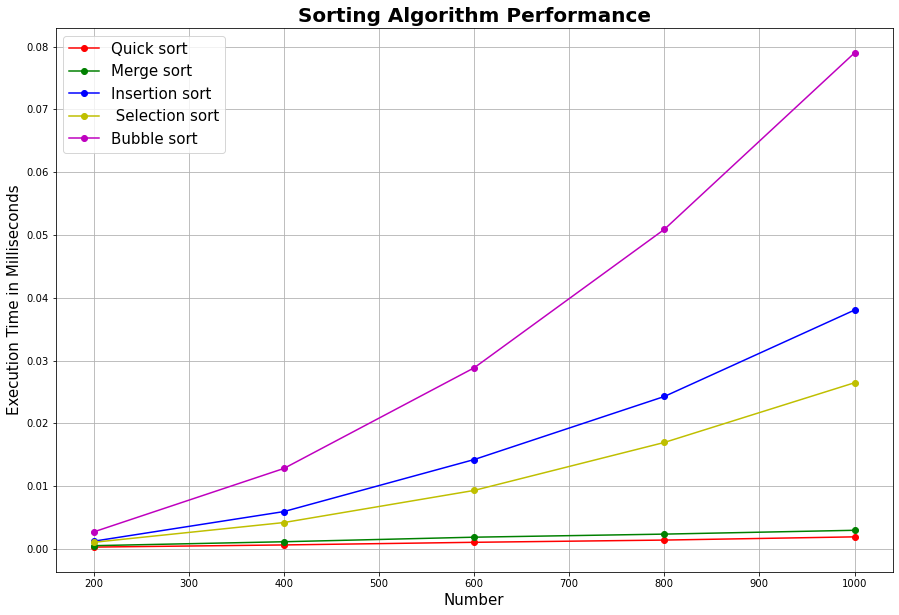

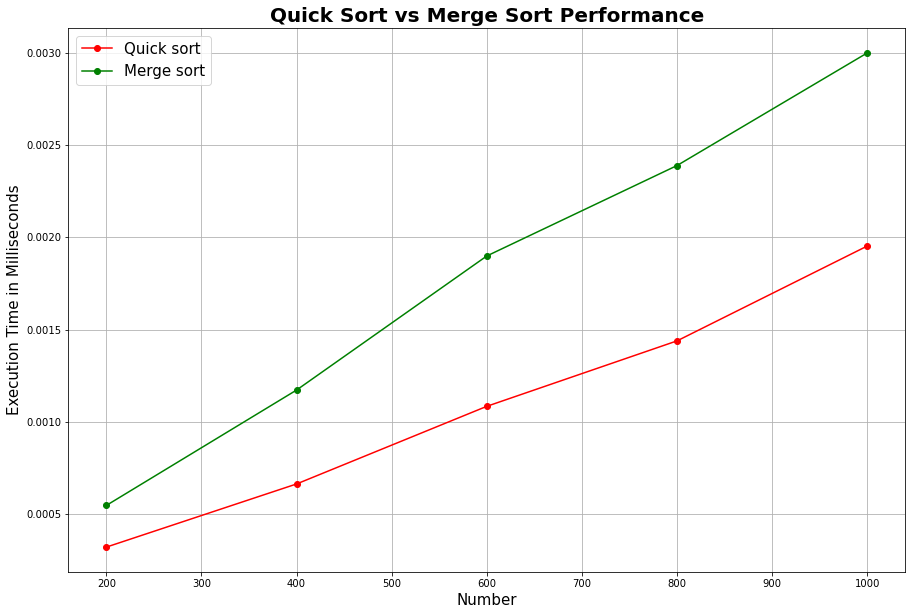

In [26]:

# plot line graph to compare runtime of quicksort, mergesort, insertionsort, selectionsort, bubblesort
# for the five random array lengths 

plt.rcParams["figure.figsize"] = (15,10)
plt.grid()
plt.plot(summary_table["Array length"], summary_table["Quick sort time"], 'r-o',
         summary_table["Array length"], summary_table["Merge sort time"], 'g-o',
         summary_table["Array length"], summary_table["Insertion sort time"], 'b-o',
         summary_table["Array length"], summary_table["Selection sort time"], 'y-o',
         summary_table["Array length"], summary_table["Bubble sort time"], 'm-o'
        )
plt.legend(["Quick sort","Merge sort", "Insertion sort"," Selection sort", "Bubble sort"],loc=2, prop={'size': 15})
plt.title("Sorting Algorithm Performance", fontsize = 20, fontweight='bold')
plt.xlabel("Number", fontsize = 15 )
plt.ylabel('Execution Time in Milliseconds' ,fontsize = 15)
#plt.yticks(np.arange(min((summary_table.iloc[:,1:]).min()), max((summary_table.iloc[:,1:]).max())+0.01, .004))
plt.show()

# plot line graph to compare runtime of quicksort, mergesort  for the five random array lengths 

plt.rcParams["figure.figsize"] = (15,10)
plt.grid()
plt.plot(summary_table["Array length"], summary_table["Quick sort time"], 'r-o',
         summary_table["Array length"], summary_table["Merge sort time"], 'g-o',
        
        )
plt.legend(["Quick sort","Merge sort"],loc=2, prop={'size': 15})
plt.title("Quick Sort vs Merge Sort Performance", fontsize = 20, fontweight='bold')
plt.xlabel("Number", fontsize = 15 )
plt.ylabel('Execution Time in Milliseconds' ,fontsize = 15)
plt.show()

# Discussion and Executive Summary 



Bubble sort, selection sort and insertion sort exhibit a time complexity of O(n^2) which makes them very slow as the array size increases. However, out of the three, bubble sort is the slowest by a big margin, followed by insertion sort and finally selection sort. This difference in the runtime is due to how each algorithm writes-in-memory while sorting. For example, Selection Sort does O(n) writes to memory whereas Bubble Sort does O(n^2) writes.

Quick sort has an average run time of O(n log n) and worst case run time of O(n^2) and Merge sort has an average and worst case run time of O(n log n). In the above graph, both exhibit the O(n log n), which is much faster than the other three algorithms, especially when the array size increases (better scalability). However, quick sort has slightly better performance compared to merge sort. This is because merge sort requires more memory space (depending on data structure) compared to quick sort. Quick sort is generally faster in practice because it hits the average case way more often than the worst case and is also memory space constant.

Quick sort is considered one of the fastest sorting algorithms, because of its divide-and-conquer strategy of selecting a  pivot, moving all values less than the pivot to a sub-array to the left and all values greater than the pivot to a sub-array on the right. The sub-arrays are then sorted recursively until they reach their base case.

Finally, as a Data Engineer, we should not only rely on time complexity metrics, but also look at how an algorithm uses memory and how different data structures may impact an algorithm differently, when evaluating and implementing an algorithm for an application. 



# Refrences:

1. https://www.geeksforgeeks.org/
2. Bhargava, A. Y. (2016). Grokking Algorithms: An Illustrated Guide for Programmers and Other Curious People
3. Module sample code